# Titanic - Machine Learning from Disaster

### Import packages and modules

In [2452]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#  Magic function from IPython that renders figures in a notebook
# instead of displaying a dump of the figure objects
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer
from sklearn.pipeline import  Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

### Load datasets

In [2453]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
# Use paths
# '/kaggle/input/titanic/train.csv'
# '/kaggle/input/titanic/test.csv'
# when using Kaggle notebook

### Describe dataset columns and value options

In [2454]:
# COLUMN NAME       DEFINITION              VALUE
# Survived          Survival                0 = No, 1 = Yes
# Pclass            Ticket class            1 = 1st, 2 = 2nd, 3 = 3rd
# Sex               Sex
# Age               Age in years
# SibSp             Num of siblings/spouses
#                   aboard with passenger
# Parch             Num of parents/children
#                   aboard with passenger
# Ticket            Ticket number   
# Fare              Passenger fare
# Cabin             Cabin number
# Embarked          Port of embarkation     C = Cherbourg, Q = Queenstown, S = Southampton

### Explore datasets

In [2455]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2456]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2457]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2458]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [2459]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2460]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [2461]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [2462]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [2463]:
# Group by 'Pclass' and show 'Survived' means,
# i.e., show 'Survived' means for all unique 'Pclass' values
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()
# The higher passenger's class was, the more likely they were to survive

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [2464]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()
# Females were much more likely to survive than males

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [2465]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()
# You had best chances of survival if you had a total of one sibling/spouse on board with you

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [2466]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()
# You had best chances of survival if you had a total of three parents/children on board with you

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [2467]:
# Create a new column 'Family_Size' for both datasets
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [2468]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()
# You had best chances of survival if you were traveling with a family of four

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [2469]:
# Create a dictionary with descriptions for family sizes
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
# Apply the dictionary to every element in 'Family_Size'
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)

train_df['Family_Size_Grouped']
# Now the old numerical values are replaced with the descriptions

0      Small
1      Small
2      Alone
3      Small
4      Alone
       ...  
886    Alone
887    Alone
888    Small
889    Alone
890    Alone
Name: Family_Size_Grouped, Length: 891, dtype: object

In [2470]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()
# Here's the family size's effect to survival rates again, but with the descriptions

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [2471]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()
# You had best chances of survival if you embarked from Cherbourg, least if from Southampton

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Minimize ages and fares into numerical categories

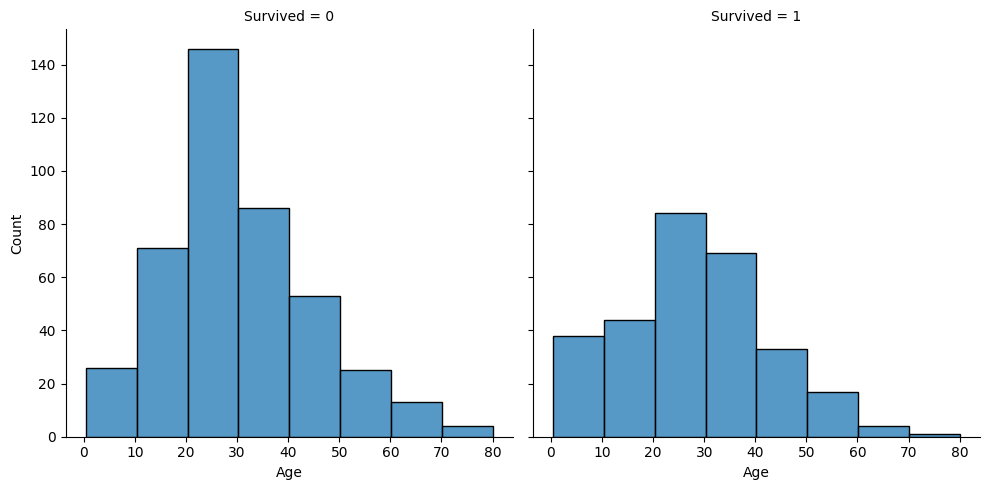

In [2472]:
# Draw a distribution plot
# Use col='Survived' to divide the plot into as many vertical (row for horizontal) facets/sides there are unique values in 'Survived' (0 and 1)
# 'binwidth' defines the width of each pillar, i.e., the granularity of the plot
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)
# The left facet shows fatality counts in age groups,
# right facet shows survived passenger counts in age groups

In [2473]:
# Currently the passengers' ages are float numbers basically from 0 to 80
# That might be a bit hard for our classifier model to handle
# So, we'll minimize the ages into a handful of age categories

# With Pandas' qcut function, cut ages up into eight equal-sized buckets (into octaves)
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [2474]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()
# There are the same number of samples/passengers in each bucket (0–7),
# and the age ranges are as shown

/var/folders/w1/r9nzthh16s95nqbsng7tmhc40000gn/T/ipykernel_31500/431275742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [2475]:
# Set 'Age' values as 0–7, depending on age ranges
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age']

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

In [2476]:
train_df.head()
# Now the ages are shown as numerical categories

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


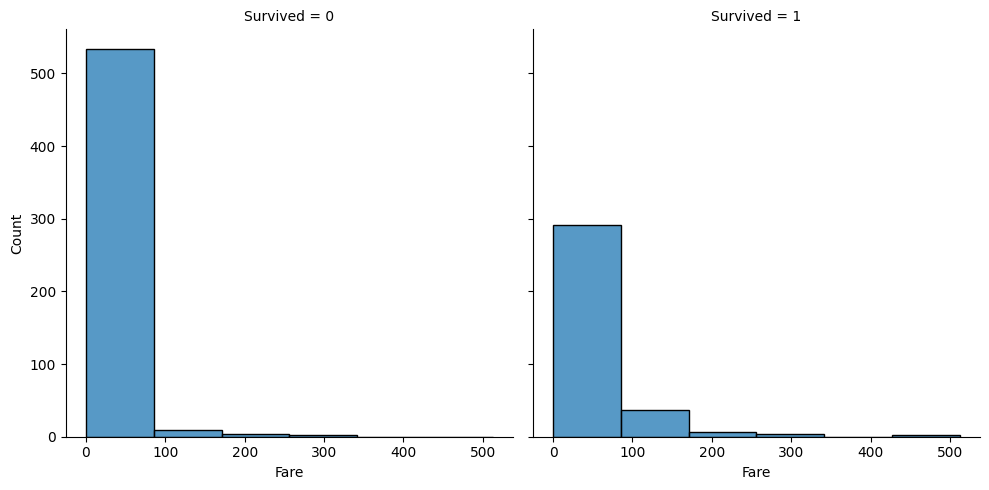

In [2477]:
# Plot fatalities and survived passengers by passenger fares
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [2478]:
# The passenger fares are also float numbers
# We'll do the same for them as we did for ages

# Cut fares up into six buckets
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [2479]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

/var/folders/w1/r9nzthh16s95nqbsng7tmhc40000gn/T/ipykernel_31500/1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [2480]:
# Set 'Fare' values as 0–5, depending on fare ranges
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare']

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare']

343    512.3292
Name: Fare, dtype: float64

In [2481]:
train_df.head()
# Now also the fares are categorized

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


### Extract passenger titles

In [2482]:
# Do a string split to extract titles (Mr., Miss., etc.) from passenger names

# Start by displaying the names so we can see the string structure
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [2483]:
# Use the commas found right after the lastnames to split the name strings into two sections (0 and 1)
train_df['Name'].str.split(pat=',', expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [2484]:
# You can grab a hold of section 1 like this
train_df['Name'].str.split(pat=',', expand=True)[1]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [2485]:
# Continue by splitting section 1 using the dots in the titles
# Now there are three sections (0, 1, and 2)
train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)

,0,1,2
0,Mr,Owen Harris,None
1,Mrs,John Bradley (Florence Briggs Thayer),None
2,Miss,Laina,None
3,Mrs,Jacques Heath (Lily May Peel),None
4,Mr,William Henry,None
...,...,...,...
886,Rev,Juozas,None
887,Miss,Margaret Edith,None
888,Miss,"Catherine Helen ""Carrie""",None
889,Mr,Karl Howell,None


In [2486]:
# Grab a hold of the titles
train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0]

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: 0, Length: 891, dtype: object

In [2487]:
# Then, create a new 'Title' column to the data frame
# Pandas' apply function lets you create a new column
# apply requires a function as an argument, so we give it a lambda
# The lambda gets the extracted title as an argument,
# then strips any leading and trailing whitespaces from it
train_df['Title'] = train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x : x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x : x.strip())

In [2488]:
train_df.head()
# Now the titles are extracted into their own column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr


In [2489]:
# Show counts and means for the titles
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


In [2490]:
# Capt, Col, and Major are military titles
# Jonkheer, the Countess, Don, Lady, and Sir are noble titles
# Mlle, Ms, and Mme are titles for noble, unmarried females

# Replace the titles with the mentioned title groups
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
})

In [2491]:
# Show counts and means for the title groups
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


### Take a look at passenger name lengths, if the length has an effect on survivability

In [2492]:
# Take each name length and put them in a separate column
train_df['Name_Length'] = train_df['Name'].apply(lambda x : len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x : len(x))

In [2493]:
train_df.head()
# Now there's a column for the lengths

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24


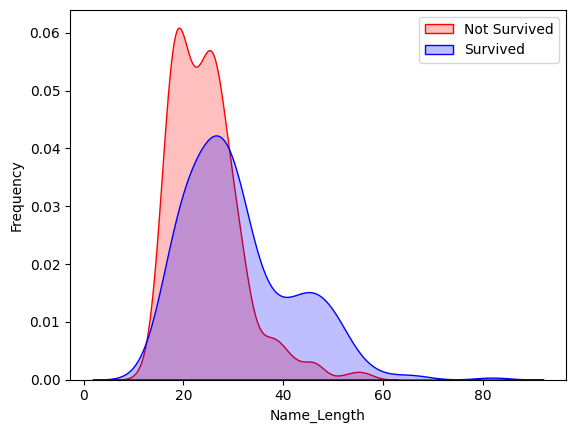

In [2494]:
# Plot the name lengths as a kernel density estimate (KDE) plot
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])
# A lengthy name had a positive effect on survival

In [2495]:
# Let's minimize also the name lengths into categories 0–7

# Cut name lengths up into eight buckets
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 8)

In [2496]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()
# Different name length ranges had different survival probabilities

/var/folders/w1/r9nzthh16s95nqbsng7tmhc40000gn/T/ipykernel_31500/2800643035.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [2497]:
# Set 'Name_LengthGB' values as 0–7, depending on name length ranges
# Create a new column in the process
train_df.loc[train_df['Name_Length'] <= 18, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 18) & (train_df['Name_Length'] <= 20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23) & (train_df['Name_Length'] <= 25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25) & (train_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30) & (train_df['Name_Length'] <= 38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size']

test_df.loc[test_df['Name_Length'] <= 18, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 18) & (test_df['Name_Length'] <= 20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23) & (test_df['Name_Length'] <= 25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25) & (test_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30) & (test_df['Name_Length'] <= 38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [2498]:
train_df.head()
# Now there's this new column for name sizes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


### Explore tickets

In [2499]:
train_df['Ticket'].head()
# The ticket IDs end with a number, we'll extract that

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [2500]:
# Grab the ticket number
train_df['Ticket_Number'] = train_df['Ticket'].apply(lambda x : pd.Series({'Ticket': x.split()[-1]})) # Pandas Series is like a column in a table (so a one-dimensional array)
test_df['Ticket_Number'] = test_df['Ticket'].apply(lambda x : pd.Series({'Ticket': x.split()[-1]}))

In [2501]:
train_df['Ticket_Number']
# Now we've extracted the number

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket_Number, Length: 891, dtype: object

In [2502]:
# Show counts and means for the ticket numbers
train_df.groupby(['Ticket_Number'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)
# We discover there are some common ticket numbers

,Ticket_Number,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [2503]:
# Show counts representing how many passengers had that ticket number
# 1 for only that passenger
# 2 for one other passenger, etc.
train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_Number, Length: 891, dtype: int64

In [2504]:
# Create a new column for ticket number counts
train_df['Ticket_Number_Counts'] = train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')
test_df['Ticket_Number_Counts'] = test_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [2505]:
train_df['Ticket_Number_Counts'].head()
# You can see the column is there

0    1
1    1
2    1
3    2
4    1
Name: Ticket_Number_Counts, dtype: int64

In [2506]:
# Show counts and survival probability for different ticket number counts
train_df.groupby(['Ticket_Number_Counts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)
# You had best chances of survival if there were two other passengers with the same ticket number as you (so 3 in total)

,Ticket_Number_Counts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [2507]:
# Next, analyze the first section of the ticket

# Divide the tickets into three sections (0, 1, and 2)
train_df['Ticket'].str.split(pat=' ', expand=True)

# Section 0 represents ticket location if it's alphabetical and not numerical
# If section 1 is 'None', then section 0 will be numerical
# Next, we're going to extract alphabetical ticket locations into a column

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [2508]:
# Grab ticket locations
# If alphabetical ticket location doesn't exist,
# value in 'Ticket_Location' will be set as 'Blank'

# Numpy's where function accepts a condition and two outcomes

# The condition to be checked
condition = train_df['Ticket'].str.split(pat=' ', expand=True)[1].notna()
# Return this if it's not null
#x = train_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x : x.split())
x = train_df['Ticket'].str.split(pat=' ', expand=True)[0]
# Return this if it's null
y = 'Blank'

# Create a new column 'Ticket_Location'
# Set its value as the alphabetical ticket location (x), or 'Blank' (y),
# depending on whether condition is null or not
train_df['Ticket_Location'] = np.where(condition, x, y)

In [2509]:
# Same for the test set

condition = test_df['Ticket'].str.split(pat=' ', expand=True)[1].notna()
x = test_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x : x.split())
y = 'Blank'

test_df['Ticket_Location'] = np.where(condition, x, y)

In [2510]:
train_df['Ticket_Location']
# Here they are

0           A/5
1            PC
2      STON/O2.
3         Blank
4         Blank
         ...   
886       Blank
887       Blank
888       W./C.
889       Blank
890       Blank
Name: Ticket_Location, Length: 891, dtype: object

In [2511]:
# Show counts for different ticket location values
train_df['Ticket_Location'].value_counts()
# There are plenty of different values, but most are still blank

Ticket_Location
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [2512]:
# Combine similar ticket locations together (SC/PARIS goes as SC/Paris and A/4. goes as A/4, for example)
train_df['Ticket_Location'] = train_df['Ticket_Location'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C',
})

test_df['Ticket_Location'] = test_df['Ticket_Location'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C',
})

In [2513]:
train_df['Ticket_Location'].value_counts()
# Now some of the ticket locations are combined

Ticket_Location
Blank         665
PC             60
CA             41
A/5            21
SOTON/OQ       15
STON/O         12
SC/Paris       11
W/C            10
STON/O2.        6
A/4             6
F.C.C.          5
C               5
S.O.C.          5
SC/AH           3
S.O./P.P.       3
PP              3
P/PP            2
WE/P            2
SOTON/O2        2
S.W./PP         1
F.C.            1
A/S             1
SC              1
A4.             1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
W.E.P.          1
SO/C            1
S.P.            1
S.C./A.4.       1
C.A./SOTON      1
Name: count, dtype: int64

In [2514]:
train_df.groupby(['Ticket_Location'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)
# Here you can see that different ticket locations had variating effects on survival probability

,Ticket_Location,count,mean
4,Blank,665,0.383459
12,PC,60,0.650000
7,CA,41,0.341463
1,A/5,21,0.095238
26,SOTON/OQ,15,0.133333
27,STON/O,12,0.416667
22,SC/Paris,11,0.454545
31,W/C,10,0.100000
0,A/4,6,0.000000
28,STON/O2.,6,0.500000


### Explore cabins

In [2515]:
# Replace null values with 'U' (unknown)
train_df['Cabin'] = train_df['Cabin'].fillna('U')
# Extract the leading letters (A, B, C, D, E, F, G, and T) from the cabin numbers
# Loop through each value in 'Cabin' column
# If an element isn't null, take the first character of the cabin string (i[0])
# If an element is null, replace it with 'x'
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']]) # Pandas Series is like a column in a table (so a one-dimensional array)

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [2516]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])
# Also cabin categories had an effect on survival probability

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [2517]:
# Create a new column 'Cabin_Assigned' and make it use binary representation:
# Set value as 0 if previously 'U', else 1
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)

In [2518]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])
# It was much more likely for people to survive if they had a cabin, compared to people without cabins

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667
